In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


パッケージの読み込み

In [2]:
#パッケージの読み込みは[import]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#データの読み込みはPandasの[read_csv()]
data_train = pd.read_csv('../input/titanic/train.csv')
data_test = pd.read_csv('../input/titanic/test.csv')
data_gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

# # **EDA(探索的データ分析）**

In [4]:
#変数名で実行すれば中身を表示してくれる(pd読み込みのcsvファイル)
#ただし、数が多いと自動で省略される。
data_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [5]:
pd.get_option('display.max_rows')

60

In [6]:
pd.set_option('display.max_rows', 900)

In [7]:
data_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [8]:
data_test.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [9]:
#データ数が多いと表示に時間がかかる。
#デフォルトは5行

In [10]:
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [11]:
data_test.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [12]:
data_gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [13]:
#describe()を使えば、主要な統計指標をまとめて確認できる。

In [14]:
data_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [15]:
#データの概要をざっと確認するには、[pandas_profiling]が便利
import pandas_profiling

In [16]:
#実行はpandas.DataFrameの[profile_report()]
data_train.profile_report()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **各特徴量と目的変数の関係性を確認**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

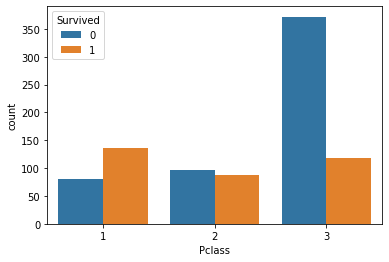

In [17]:
#PclassとSurvivedの件数を棒グラフで可視化
sns.countplot(x='Pclass', hue='Survived', data = data_train)

上記のSurvivedとPclassとの関係性より、3等ほどより生存率が低いことが読み取れる

<AxesSubplot:xlabel='Sex', ylabel='count'>

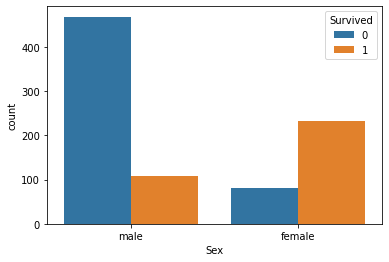

In [18]:
#SexとSurvivedの件数を棒グラフで可視化する。
sns.countplot(x='Sex', hue='Survived', data = data_train)

上記の結果より、男性は生存率が低く、女性は生存率が高い

<AxesSubplot:xlabel='Age', ylabel='count'>

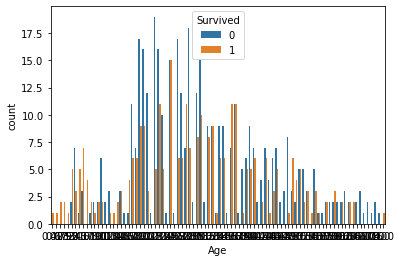

In [19]:
#AgeとSurvivedの件数を棒グラフで可視化する。
#データ件数が多いと非常にみづらい
sns.countplot(x='Age', hue='Survived', data = data_train)

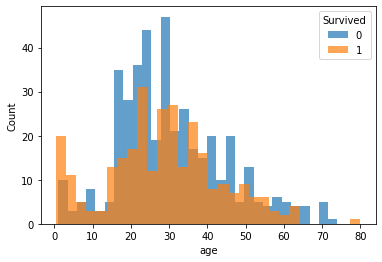

In [20]:
#ヒストグラムで幅を取って確認を行う。
plt.hist(data_train.loc[data_train['Survived'] == 0, 'Age'].dropna(), bins=30, alpha=0.7, label='0')
plt.hist(data_train.loc[data_train['Survived'] == 1, 'Age'].dropna(), bins=30, alpha=0.7, label='1')
plt.xlabel('age')
plt.ylabel('Count')
plt.legend(title='Survived')

・18歳以下程度の子供は優先的に救助された可能性が高い。

・18以上になると死亡率が生存率を上回るため、救助の有無に対して年齢が寄与しなくなる

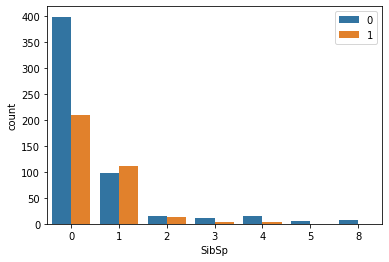

In [21]:
#SibSpとSurvivedの件数を棒グラフで可視化
sns.countplot(x='SibSp', hue='Survived', data=data_train)
plt.legend(loc='upper right')

SibSp = 0で兄妹や配偶者がいない場合、死亡率が生存率を2倍程度上回る。
SibSp = 1では、生存率が死亡率がわずかに上回るようになる。

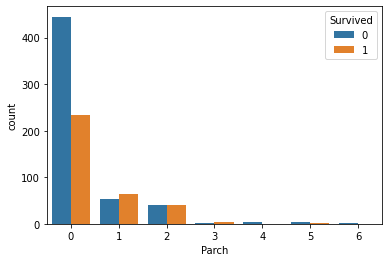

In [22]:
#ParchとSurvivedの件数を棒グラフで可視化
sns.countplot(x='Parch', hue='Survived', data=data_train)
#凡例の位置固定
plt.legend(loc='upper right', title='Survived')

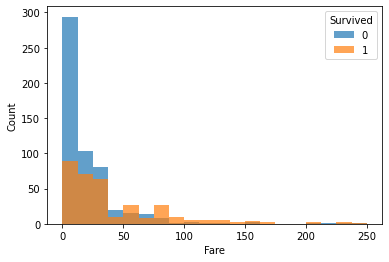

In [23]:
#ヒストグラムで幅を取って確認
#特定の範囲に集まっているときは、ピンの範囲を指定したほうが見やすい

plt.hist(data_train.loc[data_train['Survived'] == 0, 'Fare'].dropna(),range=(0,250), bins=20, alpha=0.7, label='0')
plt.hist(data_train.loc[data_train['Survived'] == 1, 'Fare'].dropna(),range=(0,250), bins=20, alpha=0.7, label='1')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived')

運賃が0付近の人の生存率は極めて低い
中央値を

<AxesSubplot:xlabel='Embarked', ylabel='count'>

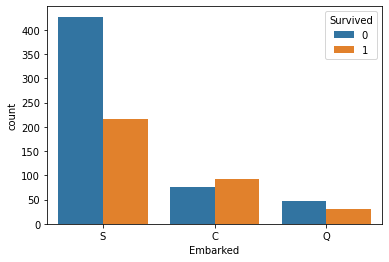

In [24]:
#EmbarkedとSurvivedの件数を棒グラフで可視化する。
sns.countplot(x='Embarked', hue='Survived', data=data_train)

出港した港ごとに生存率が異なることから、客層が異なる可能性や、乗船した船の客室の位置が異なっていた可能性が考えられる。？

# 特徴量エンジニアリング

In [25]:
#教師データとテストデータ、双方にエンジニアリングを行うため、いったん一つに結合する。
data_all = pd.concat([data_train, data_test], sort=False)
data_all

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male   NaN      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male   NaN      0   
417                           Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
0        0           A/5 21171    7.2500   NaN        S  
1        0            PC 17599   71.2833   C85        C  
2        0    STON/O2. 3101282    7.9250   NaN        S  
3        0              113803   53.1000  C123        S  
4        0              373450    8.0500   NaN        S  
..     ...                 ...       ...   ...      ...  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

#各特徴量の欠損値の数を確認
#テストデータには"Survived"がないため、欠損値としてカウントされている。

In [26]:
data_all.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# 指針

1.sexは女性が圧倒的に生存率が高いため、男性と女性別々の特徴量に分けてみる
2.ParchとSibSpはどちらも家族構成の特徴量であり、人数に応じて生存率が変わることから、2つを組み合わせた特徴量を作ってみる
3.Ageは年代さが大きいため、平均に標準偏差を加えて、バラツキを考慮する。

In [27]:
#sexの値を男性/女性で分ける。
data_all['Sex_male'] = data_all['Sex'].replace(['male', 'female'], [1,0])
data_all['Sex_female'] = data_all['Sex'].replace(['male', 'female'], [0,1])
data_all['Sex'] = data_all['Sex'].replace(['male', 'female'], [0,1])
data_all.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  Sex_male  Sex_female  
0         A/5 21171   7.2500   NaN        S         1           0  
1          PC 17599  71.2833   C85        C         0           1  
2  STON/O2. 3101282   7.9250   NaN        S         0           1  
3            113803  53.1000  C123        S         0           1  
4            373450   8.0500   NaN        S         1           0

<AxesSubplot:xlabel='Families', ylabel='count'>

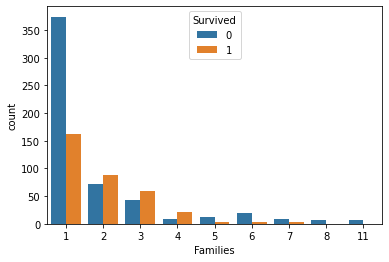

In [28]:
#ParchとSibSpを合わせた特徴量を作成
data_all['Families'] = data_all['Parch'] + data_all['SibSp'] + 1
data_train['Families'] = data_all['Families'][:len(data_train)]
data_test['Families'] = data_all['Families'][len(data_train):]
sns.countplot(x='Families', data=data_train, hue='Survived')

In [29]:
#1の独身者が圧倒的に多いため、このパラメータのみ別の特徴量として抜き出す。
data_all['Alone'] = 0
data_all.loc[data_all['Families'] == 1, 'Alone'] = 1
data_all.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  Sex_male  Sex_female  Families  \
0         A/5 21171   7.2500   NaN        S         1           0         2   
1          PC 17599  71.2833   C85        C         0           1         2   
2  STON/O2. 3101282   7.9250   NaN        S         0           1         1   
3            113803  53.1000  C123        S         0           1         2   
4            373450   8.0500   NaN        S         1           0         1   

   Alone  
0      0  
1      0  
2      1  
3      0  
4      1

In [30]:
ave = data_all['Age'].mean()
std = data_all['Age'].std()
#[平均±標準偏差]間の値からランダムで選ばれた値で補完する。
data_all['Age'].fillna(np.random.randint(ave-std, ave+std), inplace = True)
data_all.head()
#乱数なので再現性が無いという欠点がある
#年齢は若い人から高齢者まで幅広いため、中央値で補完するのも手
#data_all['Age'].fillna(data_all['Age'].median(), inplace=True)

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  Sex_male  Sex_female  Families  \
0         A/5 21171   7.2500   NaN        S         1           0         2   
1          PC 17599  71.2833   C85        C         0           1         2   
2  STON/O2. 3101282   7.9250   NaN        S         0           1         1   
3            113803  53.1000  C123        S         0           1         2   
4            373450   8.0500   NaN        S         1           0         1   

   Alone  
0      0  
1      0  
2      1  
3      0  
4      1

In [31]:
data_all.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  Sex_male  Sex_female  Families  \
0         A/5 21171   7.2500   NaN        S         1           0         2   
1          PC 17599  71.2833   C85        C         0           1         2   
2  STON/O2. 3101282   7.9250   NaN        S         0           1         1   
3            113803  53.1000  C123        S         0           1         2   
4            373450   8.0500   NaN        S         1           0         1   

   Alone  
0      0  
1      0  
2      1  
3      0  
4      1

In [32]:
#Embarkedの欠損値を補完して、数値に置き換える。
data_all['Embarked'].fillna('S', inplace=True)
data_all['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)

In [33]:
#LightGBMはカテゴリ変数を数値に置き換えなくても処理してくれる。
categorical_features = ['Sex', 'Embarked', 'Pclass']

In [34]:
data_all.head(100)

PassengerId  Survived  Pclass  \
0             1       0.0       3   
1             2       1.0       1   
2             3       1.0       3   
3             4       1.0       1   
4             5       0.0       3   
5             6       0.0       3   
6             7       0.0       1   
7             8       0.0       3   
8             9       1.0       3   
9            10       1.0       2   
10           11       1.0       3   
11           12       1.0       1   
12           13       0.0       3   
13           14       0.0       3   
14           15       0.0       3   
15           16       1.0       2   
16           17       0.0       3   
17           18       1.0       2   
18           19       0.0       3   
19           20       1.0       3   
20           21       0.0       2   
21           22       1.0       2   
22           23       1.0       3   
23           24       1.0       1   
24           25       0.0       3   
25           26       1.0       3   
26           27       0.0       3   
27           28       0.0       1   
28           29       1.0       3   
29           30       0.0       3   
30           31       0.0       1   
31           32       1.0       1   
32           33       1.0       3   
33           34       0.0       2   
34           35       0.0       1   
35           36       0.0       1   
36           37       1.0       3   
37           38       0.0       3   
38           39       0.0       3   
39           40       1.0       3   
40           41       0.0       3   
41           42       0.0       2   
42           43       0.0       3   
43           44       1.0       2   
44           45       1.0       3   
45           46       0.0       3   
46           47       0.0       3   
47           48       1.0       3   
48           49       0.0       3   
49           50       0.0       3   
50           51       0.0       3   
51           52       0.0       3   
52           53       1.0       1   
53           54       1.0       2   
54           55       0.0       1   
55           56       1.0       1   
56           57       1.0       2   
57           58       0.0       3   
58           59       1.0       2   
59           60       0.0       3   
60           61       0.0       3   
61           62       1.0       1   
62           63       0.0       1   
63           64       0.0       3   
64           65       0.0       1   
65           66       1.0       3   
66           67       1.0       2   
67           68       0.0       3   
68           69       1.0       3   
69           70       0.0       3   
70           71       0.0       2   
71           72       0.0       3   
72           73       0.0       2   
73           74       0.0       3   
74           75       1.0       3   
75           76       0.0       3   
76           77       0.0       3   
77           78       0.0       3   
78           79       1.0       2   
79           80       1.0       3   
80           81       0.0       3   
81           82       1.0       3   
82           83       1.0       3   
83           84       0.0       1   
84           85       1.0       2   
85           86       1.0       3   
86           87       0.0       3   
87           88       0.0       3   
88           89       1.0       1   
89           90       0.0       3   
90           91       0.0       3   
91           92       0.0       3   
92           93       0.0       1   
93           94       0.0       3   
94           95       0.0       3   
95           96       0.0       3   
96           97       0.0       1   
97           98       1.0       1   
98           99       1.0       2   
99          100       0.0       2   

                                                 Name  Sex    Age  SibSp  \
0                             Braund, Mr. Owen Harris    0  22.00      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.00      1   
2                              Heikkin

In [35]:
#影響のなさそうな特徴量はいったん削除する。
drop_columns = ['PassengerId', 'Name', 'Parch', 'SibSp', 'Ticket', 'Cabin']
data_all.drop(drop_columns, axis=1, inplace=True)

In [36]:
#再確認
data_all.isnull().sum()

Survived      418
Pclass          0
Sex             0
Age             0
Fare            1
Embarked        0
Sex_male        0
Sex_female      0
Families        0
Alone           0
dtype: int64

In [37]:
#結合したデータを、再度教師データとテストデータに文意r
data_train = data_all[:len(data_train)]
data_test = data_all[len(data_train):]

# モデル作成

In [38]:
#アルゴリズムに投入するために、特徴量と目的変数を分離する。
y_data_train = data_train['Survived']
X_data_train = data_train.drop('Survived', axis=1)
X_data_test = data_test.drop('Survived', axis=1)

In [39]:
#Cross Validationでモデル作成
from sklearn.model_selection import KFold
import lightgbm as lgb

y_data_preds = []
models = []
oof_data_train = np.zeros((len(X_data_train),))
cv = KFold(n_splits=5, shuffle=True, random_state=0)

params = {
    'objective': 'binary',
    'max_bin': 300,
    'learning_rate': 0.05,
    'num_leaves': 40
}

for fold_id, (train_index, valid_index) in enumerate(cv.split(X_data_train)):
    X_tr = X_data_train.loc[train_index, :]
    X_val = X_data_train.loc[valid_index, :]
    y_tr = y_data_train[train_index]
    y_val = y_data_train[valid_index]
    
    lgb_data_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_features)
    lgb_data_eval = lgb.Dataset(X_val, y_val, reference=lgb_data_train, categorical_feature=categorical_features)
    
    model = lgb.train(params, lgb_data_train, valid_sets=lgb_data_eval,
                 verbose_eval=10,
                 num_boost_round=1000,
                 early_stopping_rounds=10)
    
    oof_data_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)
    y_data_pred = model.predict(X_data_test, num_iteration=model.best_iteration)
    
    y_data_preds.append(y_data_pred)
    models.append(model)

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [40]:
#各モデルのスコアと平均を計算
scores = [
    m.best_score['valid_0']['binary_logloss'] for m in models
]
score = sum(scores) / len(scores)
print(scores)
print(score)

[0.35886282595076363, 0.4364571018117893, 0.36732025521592465, 0.4204189952157771, 0.4398836767458675]
0.4045885709880245


In [41]:
#学習用と検証用データに分割する。
#from sklearn.model_selection import train_test_split

#X_data_train, X_data_valid, y_data_train, y_data_valid = train_test_split(X_data_train, y_data_train, test_size = 0.3, random_state = 0, stratify = y_data_train)

In [42]:
#LightGBMをインポートしてモデルを作成
#import lightgbm as lgb

#lgb_data_train = lgb.Dataset(X_data_train, y_data_train, categorical_feature = categorical_features)
#lgb_data_eval = lgb.Dataset(X_data_valid, y_data_valid, reference = lgb_data_train, categorical_feature = categorical_features)

In [43]:
#成果いつを計算(oof_data_trainに対する)
from sklearn.metrics import accuracy_score

y_data_pred_oof = (oof_data_train > 0.5).astype(int)
accuracy_score(y_data_train, y_data_pred_oof)

0.8338945005611672

In [44]:
#予測

In [45]:
y_pred_submit = sum(y_data_preds) / len(y_data_preds)
y_pred_submit = (y_pred_submit > 0.5).astype(int)
y_pred_submit

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
#作成したモデルで予測
#y_data_pred = model.predict(X_data_test, num_iteration=model.best_iteration)

In [47]:
#出力結果は0~1の連続値となる。
#y_data_pred[:5]

In [48]:
#0.5を上回れば1と予測したとみなす。
#y_data_pred = (y_data_pred>0.5).astype(int)
#y_data_pred[:5]

In [49]:
#y_data_pred

# Submit

In [50]:
#予測結果をSubmit用のcsvとして作成する。
submit = data_gender_submission

In [51]:
submit['Survived'] = list(map(int, y_data_pred))

In [52]:
submit.to_csv('lightgbm_submit4.csv', index=False)